In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np 
import cv2
import os
import seaborn as sn 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tqdm
import random
import tensorflow as tf
import sklearn
import time
import sys
%matplotlib inline

## Loading Data

Let's write a function which can enable us to read the data from the system. We will utilize the `os` library for this.
Once the data has been loaded, we can start by creating the `training, validation and testing` sets, which will be utilized in the modelling stage of the project.

In [2]:
def load_data():
    """ Helper function to load data"""
    
    # Extracting images from the directory
    yes_directory = ""
    no_directory = ""
    file_path = r"C:\Users\Sidhant Mathur\Desktop\Projects\Brain_Tumor_Detection\brain_tumor_dataset"
    for classes in os.listdir(file_path):
        if classes.startswith("y"):
            yes_directory = file_path + "\\yes"
        else:
            no_directory = file_path + "\\no"
            
    # Creating 2 lists, "yes_images" and "no_images" to store the filepaths of the images. These filepaths will be used 
    # to create the training, testing and validation set
    no_images = [file_path+"\\no\\"+str(os.listdir(no_directory)[i]) for i in range(0,len(os.listdir(no_directory)))]
    yes_images = [file_path+"\\yes\\"+str(os.listdir(yes_directory)[i]) for i in range(0,len(os.listdir(yes_directory)))]
    
    # Creating a list of labels for each suitable class label : "Tumor" or "No Tumor"
    no_label = ["No Tumor"] * len(no_images)
    yes_label = ["Tumor"] * len(yes_images)    
    
    # Merging the 2 class labels to create the final dataset
    all_images = no_images+yes_images
    all_labels = no_label+yes_label
    
    # Shuffling the elements of the dataset
    data_tuple = tuple(zip(all_images,all_labels))
    shuffled_tuple = tuple(random.sample(data_tuple, len(data_tuple)))
    shuffled_images = []
    shuffled_labels = []
    for i in range(0,len(shuffled_tuple)):
        shuffled_images.append(shuffled_tuple[i][0])
        shuffled_labels.append(shuffled_tuple[i][1])
    
    return shuffled_images,shuffled_labels

In [3]:
images, labels = load_data()

Now that we have loaded the entire dataset. Let's create the training,validation and testing data. For the spitting ratio, I will be using 75% of samples of the training set, 15% of samples for validation set and 10% of samples of the testing set. However, the user will be flexible in choosing the most appropriate ratio for the splitting the data (illustriated in the function below)

Let's create a function to perform this action!
The function will accept various arguments like: 
1. `list_of_images`: The iterator which consists of the filepaths to the images
2. `list_of_labels`: The corresponding class label for each image
3. `train_raio` : Ratio of samples to be included in the training data set
4. `valid_ratio` : Ratio of samples in the validation data set
5. `test_ratio` : Ratio of samples in the testing set

In [4]:
def create_datasets(list_of_images,list_of_labels,train_ratio,valid_ratio,test_ratio):
    """ Helper function to create training, validation and testing stage"""
    
    # Creating the indices for to demarcation of training, validation and testing set
    train_idx = int(train_ratio*len(list_of_images))
    valid_idx = int(valid_ratio*len(list_of_images))
    test_idx = int(test_ratio*len(list_of_images))
    
    train_images, train_labels = list_of_images[:train_idx] , list_of_labels[:train_idx]
    valid_images,valid_labels = list_of_images[train_idx+1: train_idx+1+valid_idx] , list_of_labels[train_idx+1: train_idx+1+valid_idx]
    test_images,test_labels = list_of_images[train_idx+1+valid_idx+1 : train_idx+1+valid_idx+1+test_idx ] , list_of_labels[train_idx+1+valid_idx+1 : train_idx+1+valid_idx+1+test_idx ]
    
    return train_images,train_labels,valid_images,valid_labels,test_images,test_labels

In [5]:
train_images,train_labels,valid_images,valid_labels,test_images,test_labels = create_datasets(images,labels,0.75,0.15,0.10)

Shuffling the dataset is a common practice while splitting the data in training,testing and validation. TThe shuffling has already been carried out while loading the data, therefore, a second round of shuffling was not needed. 
The above function is capable of granting the user with the flexibility to split the data on the basis of ratios provided by the user

Now that we have the datasets, let's start with the `Exploratory Data Analysis`!

## Exploratory Data Analysis

EDA Ideas:
1. Checking the intesitiees of each color channel in the image
2. Plotting histograms for the same
3. Take a view of each channel (Splitting an image)
4. Maximum & Minimum Pixel Values for any images

`Data Visualization` is an effective method to become familiar with the data, especially in the case of images. Let's create a function which will randomly select 5 images from each type of dataset and display them in the form of subplots.

In [6]:
def visualize_images():
    """ Helper function to visualize images randomly"""
    
    # Selecting 15 random images from the training,validation and testing set
    train_samples = random.sample(train_images, 5)
    train_class = [train_labels[train_images.index(train_samples[i])] for i in range(0,5)]
    
    valid_samples = random.sample(valid_images, 5)
    valid_class = [valid_labels[valid_images.index(valid_samples[i])] for i in range(0,5)]
    
    test_samples = random.sample(test_images, 5)
    test_class = [test_labels[test_images.index(test_samples[i])] for i in range(0,5)]
    
    fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(15,4));
    fig.suptitle("Training Set Images (Sampled Without Replacement)",fontsize=16)
    for i in range(0,5):
        ax[i].imshow(mpimg.imread(train_samples[i])); 
        ax[i].set_title(str(train_class[i]),fontsize = 14)
    fig.tight_layout()
        
    fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(15,4));
    fig.suptitle("Validation Set Images (Sampled Without Replacement)",fontsize=16)
    for i in range(0,5):
        ax[i].imshow(mpimg.imread(valid_samples[i])); 
        ax[i].set_title(str(valid_class[i]),fontsize=14)
    fig.tight_layout()
    
    fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(15,4));
    fig.suptitle("Testing Set Images (Sampled Without Replacement)",fontsize=16)
    for i in range(0,5):
        ax[i].imshow(mpimg.imread(test_samples[i])); 
        ax[i].set_title(str(test_class[i]),fontsize=14)
    fig.tight_layout()

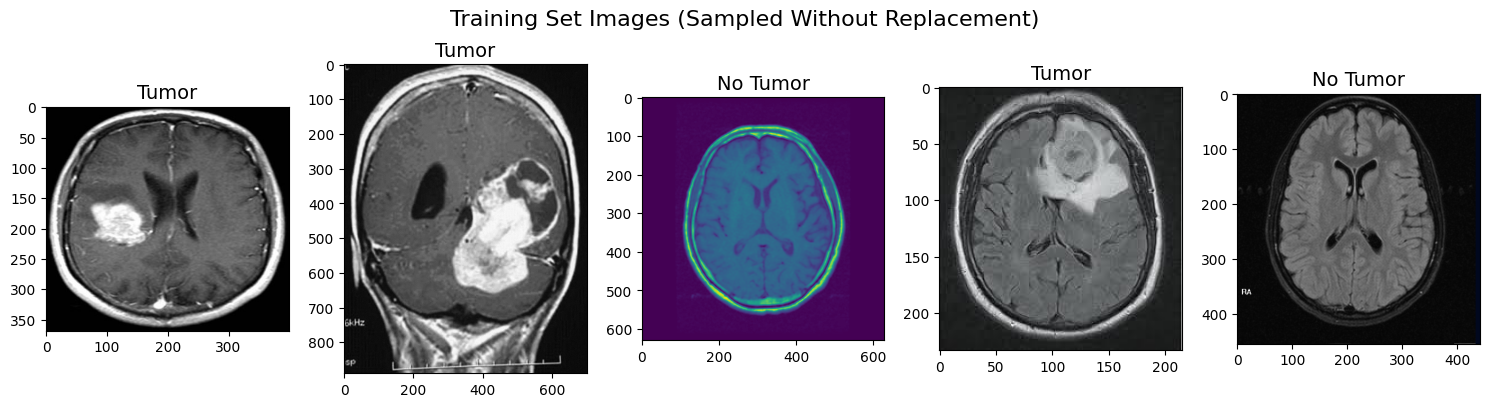

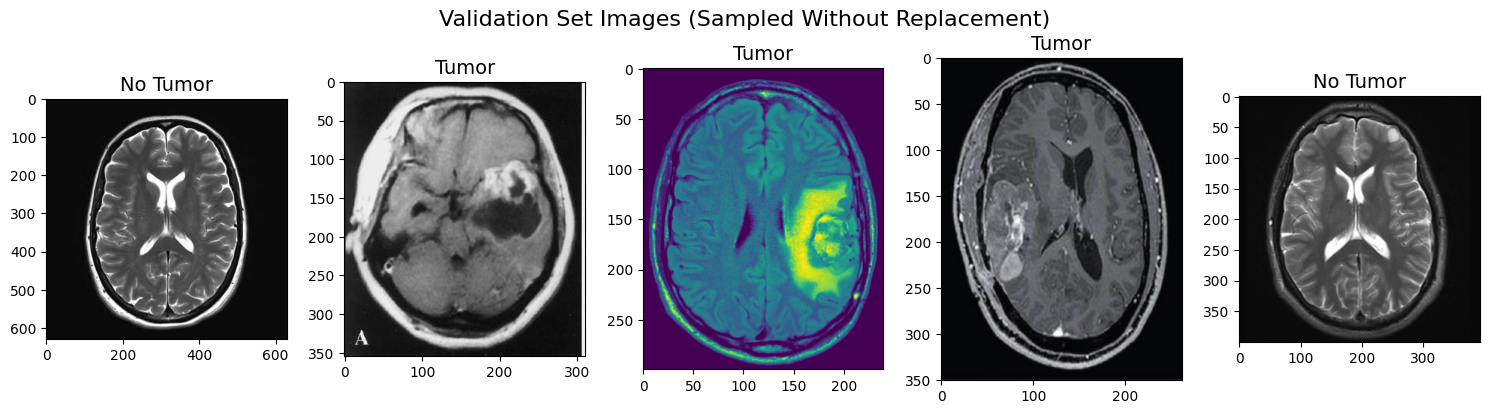

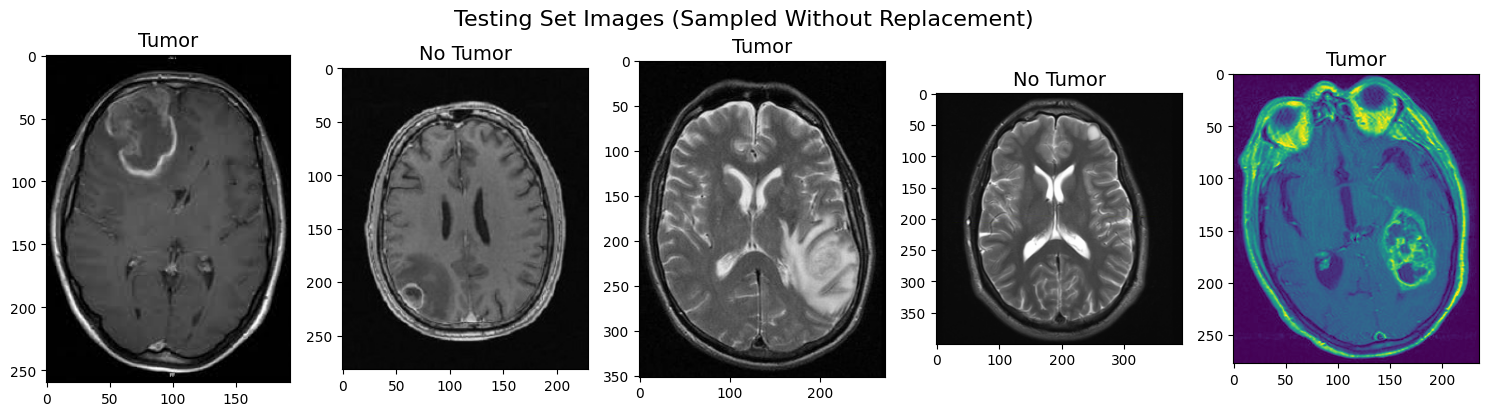

In [7]:
visualize_images()

From this subplot gird, we can filter out some noteworthy observations:
 1. There is non-uniformity of color channels in the images
 2. The images seem to have varying shapes
 3. There are varying color intensities & brightness pixels in the images
 
Before we move foreward, let's verify the second observation i.e. the varying shapes of the images.
To confirm our hypothesis, we can extract the number of pixels in length and width using the `.shape()` function. We can then plot them on a scatterplot.

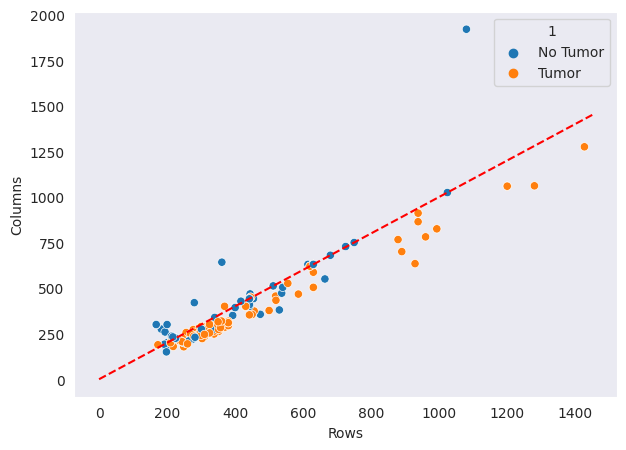

In [8]:
# Plotting image shapes
image_df = pd.DataFrame([images,labels]).T
image_df["Rows"] = [mpimg.imread(image_df[0][i]).shape[0] for i in range(0,len(image_df))]
image_df["Columns"] = [mpimg.imread(image_df[0][i]).shape[1] for i in range(0,len(image_df))]
x = [50*i for i in range(0,30)]
y = x
with sn.axes_style("dark"):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5))
    ax = sn.scatterplot(x="Rows",y="Columns",hue=1,data=image_df)
    plt.plot(x,y,linestyle='dashed', color='red')

If each of the images were the same size (i.e., had the same number of pixels in length and width), then the plot should have resembled a single dot. However, the plot consists of multiple points `indicating varying shapes` ,confirming our hypothesis. We will have to reshape our images in order to model them using neural nets.
Here are some other observation noted from the graph.

* `Pixel Area`
* `Aspect ratio` which is generally used to determine the relative horizontal and vertical sizes of computer images. For example, if a computer image has an aspect ratio of 3:1, this means the width of the graphic is three times of the height of the image.

Let's plot both of these to gather a better sense of these features:

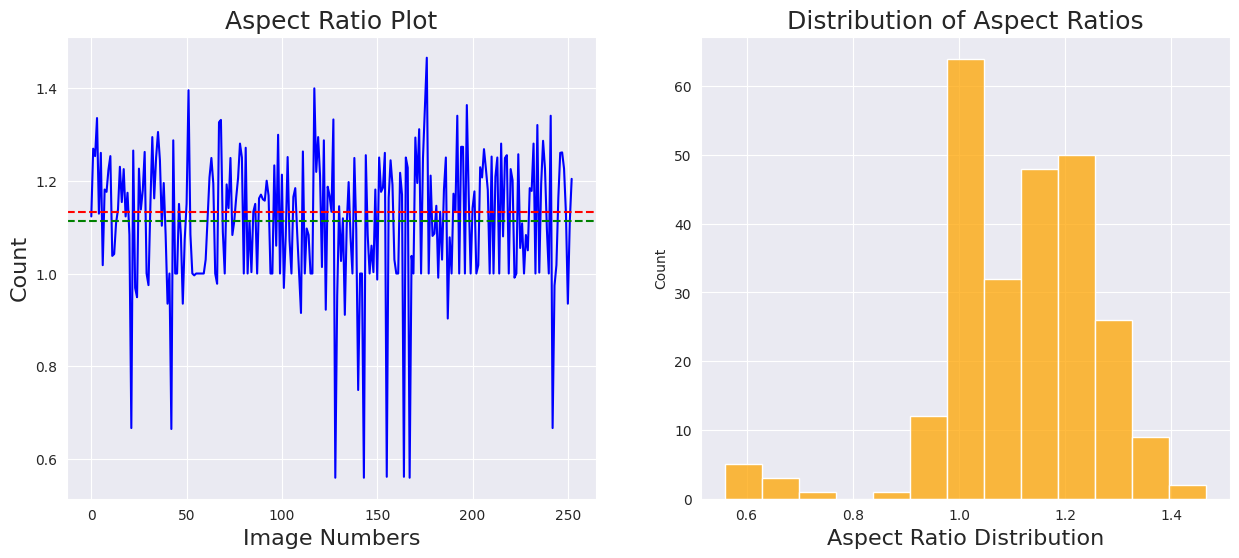

In [9]:
# Exploring Aspect Ratio
image_df["Aspect Ratio"] = round(image_df["Rows"]/image_df["Columns"],3)
with sn.axes_style("dark"):
    fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
    # Creating a line chart for aspect ratio
    ax0 = sn.lineplot(data=image_df["Aspect Ratio"],ax=ax0,color="blue");
    # Enhancing readibility of the plot
    ax0.set_title("Aspect Ratio Plot",fontsize=18)
    ax0.set_xlabel("Image Numbers",fontsize=16)
    ax0.set_ylabel("Aspect Ratio",fontsize=16)
    ax0.grid(visible=True)
    # Comparison metrics
    ax0.axhline(image_df["Aspect Ratio"].median(),color="red",linestyle="--")
    ax0.axhline(image_df["Aspect Ratio"].mean(),color="green",linestyle="--")
    
    ax1 = sn.histplot(data=image_df["Aspect Ratio"],ax=ax1,color="orange");
    # Enhancing readibility of the plot
    ax1.set_xlabel("Aspect Ratio Distribution",fontsize=16)
    ax0.set_ylabel("Count",fontsize=16)
    ax1.set_title("Distribution of Aspect Ratios",fontsize=18)
    ax1.grid(visible=True)

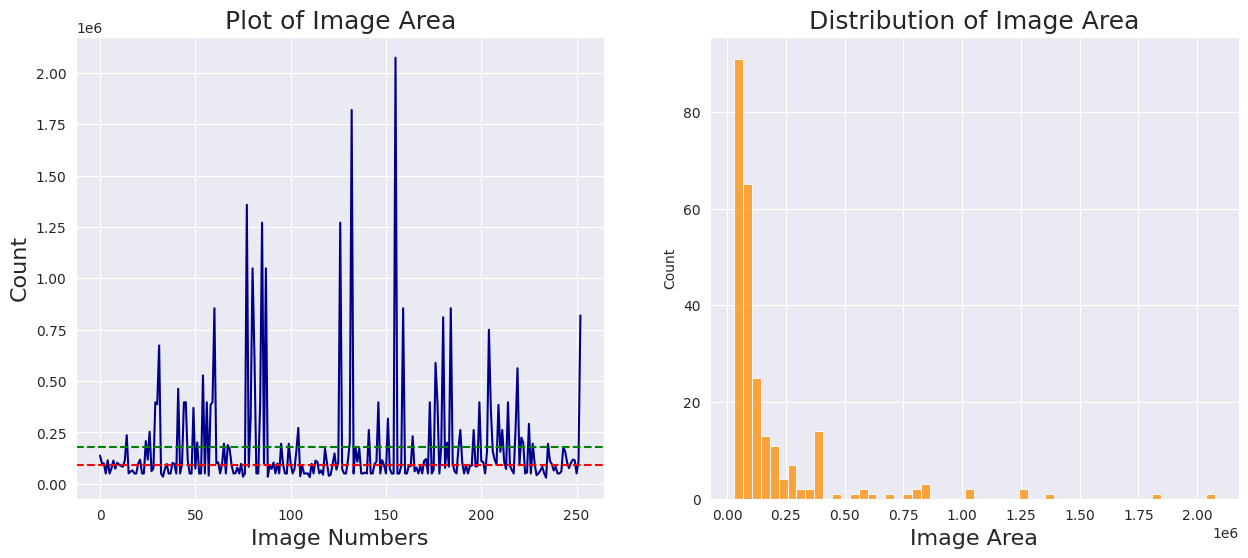

In [10]:
# Exploring Image Area
image_df["Area"] = round(image_df["Rows"]*image_df["Columns"],3)
with sn.axes_style("dark"):
    fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
    # Creating a line chart for aspect ratio
    ax0 = sn.lineplot(data=image_df["Area"],ax=ax0,color="darkblue");
    # Enhancing readibility of the plot
    ax0.set_title("Plot of Image Area",fontsize=18)
    ax0.set_xlabel("Image Numbers",fontsize=16)
    ax0.set_ylabel("Aspect Ratio",fontsize=16)
    ax0.grid(visible=True)
    # Comparison metrics
    ax0.axhline(image_df["Area"].median(),color="red",linestyle="--")
    ax0.axhline(image_df["Area"].mean(),color="green",linestyle="--")
    
    ax1 = sn.histplot(data=image_df["Area"],ax=ax1,color="darkorange");
    # Enhancing readibility of the plot
    ax1.set_xlabel("Image Area",fontsize=16)
    ax0.set_ylabel("Count",fontsize=16)
    ax1.set_title("Distribution of Image Area",fontsize=18)
    ax1.grid(visible=True)

From the image shapes plot, we can check whether there is a class imbalance in the images. Let's see if there is one using the `np.unique()` function. 

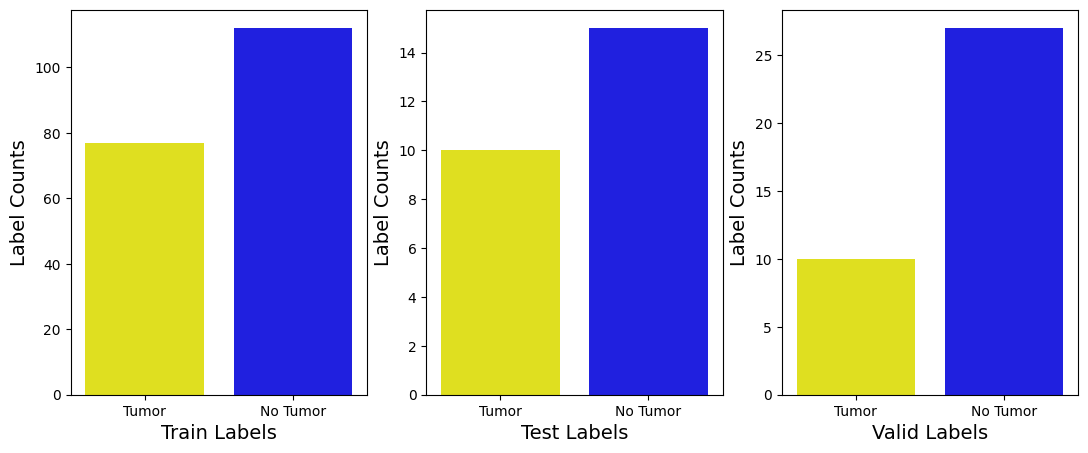

In [11]:
image_labels = ["Tumor","No Tumor"]
train_label_counts = [np.unique(train_labels,return_counts=True)[1][i] for i in range(0,2)]
test_label_counts = [np.unique(test_labels,return_counts=True)[1][i] for i in range(0,2)]
valid_label_counts = [np.unique(valid_labels,return_counts=True)[1][i] for i in range(0,2)]
fig , ax = plt.subplots(nrows=1,ncols=3,figsize=(13,5))
ax[0] = sn.barplot(x = image_labels,y=train_label_counts,ax=ax[0],palette=["yellow","Blue"])
ax[0].set_xlabel("Train Labels",fontsize=14)
ax[0].set_ylabel("Label Counts",fontsize=14)
ax[1] = sn.barplot(x = image_labels,y=test_label_counts,ax=ax[1],palette=["yellow","Blue"])
ax[1].set_xlabel("Test Labels",fontsize=14)
ax[1].set_ylabel("Label Counts",fontsize=14)
ax[2] = sn.barplot(x = image_labels,y=valid_label_counts,ax=ax[2],palette=["yellow","Blue"])
ax[2].set_xlabel("Valid Labels",fontsize=14)
ax[2].set_ylabel("Label Counts",fontsize=14)
plt.show()

There is a disbalance between the positive and negative class, however, the ratio isnt high enough for it to be consider as a class imbalance. Thus, there is `no class imbalance` in our image dataset.

With this we have gained a brief insight about our data and can move on the preprocessing stage.

## Image Pre-Processing 
Techniques for exploration: 
1. Image Resizing 
2. Normalization
3. Blurring 
4. Noise Removal 
Each of these steps will be performed in the upcoming section of the notebook!

### Grey Scale Conversion

In [12]:
def greyscale_conversion(list_of_images,conversion,type_data):
    """ Helper Function to convert images into their greyscale equivalents"""
    if conversion == False:
        random_img = random.sample(list_of_images,5)
        fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(15,6))
        for i in range(0,5):
            grey_img = cv2.cvtColor(cv2.imread(random_img[i]), cv2.COLOR_BGR2GRAY)
            ax[i].imshow(grey_img)

    if conversion==True:
        grey_scaled_images = []
        for image in tqdm.tqdm(list_of_images,file=sys.stdout,colour="green"):
            grey_img = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2GRAY)
            grey_scaled_images.append(grey_img)
            time.sleep(0.05)
        
        if type_data == "Train":
            print("Training Data Converted...")
        elif type_data == "Valid":
            print("Validation Data Converted...")
        else:
            print("Testing Data Converted...")
            
        return grey_scaled_images

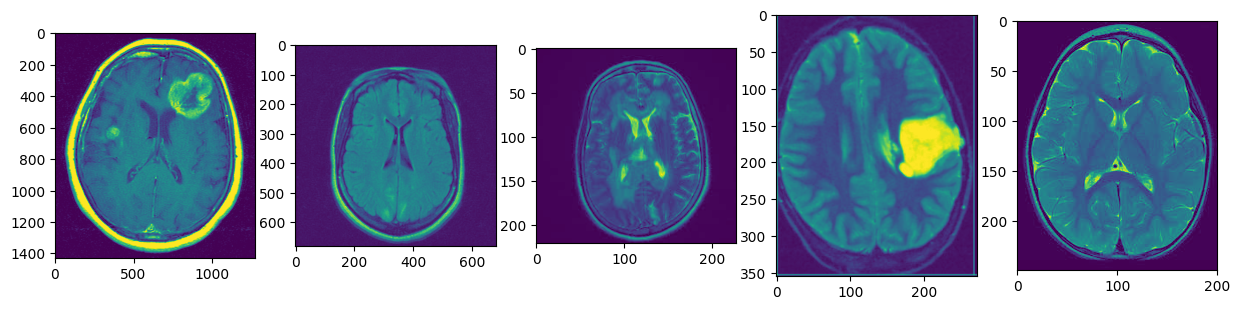

In [13]:
greyscale_conversion(train_images,conversion=False,type_data="Train")

In [14]:
greyscaled_train_images = greyscale_conversion(train_images,conversion=True,type_data="Train")
greyscaled_valid_images = greyscale_conversion(valid_images,conversion=True,type_data="Valid")
greyscaled_test_images = greyscale_conversion(test_images,conversion=True,type_data="Test")

100%|████████████████████████████████████████████████████████████████████████████████| 189/189 [00:12<00:00, 15.64it/s]
Training Data Converted...
100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:02<00:00, 15.81it/s]
Validation Data Converted...
100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:01<00:00, 15.96it/s]
Testing Data Converted...


In [15]:
len(train_images) , len(train_labels)

(189, 189)

### Resizing Images

`Resizing` is necessary when there is a need to increase or decrease the total number of pixels in an image. A common technique used to perfom resizing is `Image Interpolation`. Image interpolation works in two directions, and tries to achieve a best approximation of a pixel's color and intensity based on the values at surrounding pixels. The type of interpolation alogrithm used will also determine the level of distortion of the image.

Bi Cubic Interpolation considers the closest 4x4 neighborhood of known pixels — for a total of 16 pixels for interpolating the new pixels. Bicubic produces noticeably `sharper` images than Bilinear and Nearest Neighbor Interpolation, and is perhaps the `ideal combination of processing time and output quality`. For this reason it is a standard in many image editing programs (including Adobe Photoshop), printers. 


Let's create a function to visualize the `Resizing` operation. 
The function inputs the original image in the form of n-dimensional arrays. The resizing operation `Bi Cubic Interpolation` is applied to the n-dimensional arrays and is displayed using matplotlib subplots. 

In [16]:
def resize_image(list_of_images,new_width,new_length,visualization,conversion,type_data):
    """ Helper function for type conversion & resizing of images """
    
    if visualization == True:
        adjusted_size = (new_width,new_length)
        original_image = random.choice(list_of_images)
        resized_images = cv2.resize(src=original_image,dsize=adjusted_size,interpolation=cv2.INTER_CUBIC)
        fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
        fig.suptitle("Image Resizing Demonstration",fontsize=12)
        ax[0].imshow(original_image);
        ax[0].set_xlabel(f"Original Shape: {original_image.shape}");
        ax[1].imshow(resized_images);
        ax[1].set_xlabel(f"Resized Shape: {adjusted_size}");
    
    if conversion == True:
        resized_images = []
        for image in tqdm.tqdm(list_of_images,colour="green",file=sys.stdout):
            input_image =  image
            
            # Changing data type of the image
            if input_image.dtype != "uint8":
                input_image *= 255
                input_image = input_image.astype(np.uint8)
            
            # Resizing image
            resized_img = cv2.resize(src= input_image, dsize=(new_width,new_length),interpolation=cv2.INTER_CUBIC)
            resized_images.append(resized_img)
        if type_data == "Train":
            print("Training Data Resized...")
        elif type_data == "Valid":
            print("Validation Data Resized...")
        else:
            print("Testing Data Resized...")
        time.sleep(0.1)
        
        return resized_images

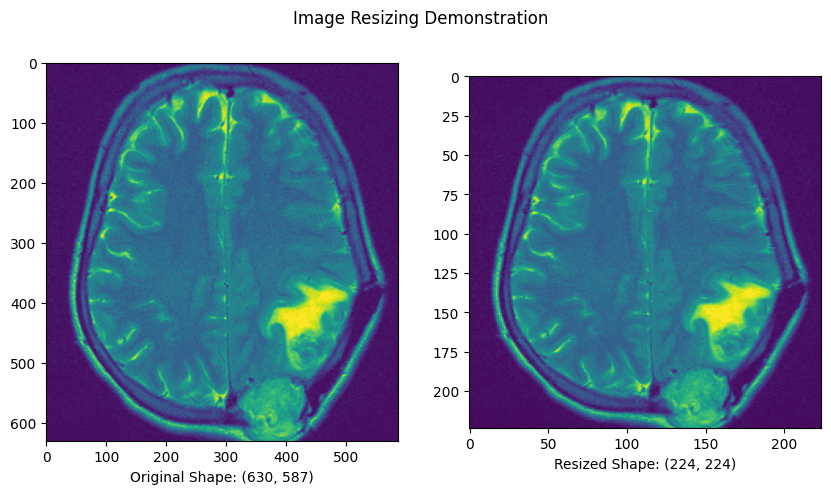

In [17]:
resize_image(greyscaled_train_images,224,224,visualization=True,conversion=False,type_data="Train")

In [18]:
resized_train_images = resize_image(greyscaled_train_images,224,224,visualization=False,conversion=True,type_data="Train")
resized_valid_images = resize_image(greyscaled_valid_images,224,224,visualization=False,conversion=True,type_data="Valid")
resized_test_images = resize_image(greyscaled_test_images,224,224,visualization=False,conversion=True,type_data="Test")

100%|██████████████████████████████████████████████████████████████████████████████| 189/189 [00:00<00:00, 4734.06it/s]
Training Data Resized...
100%|████████████████████████████████████████████████████████████████████████████████| 37/37 [00:00<00:00, 2194.39it/s]
Validation Data Resized...
100%|██████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<?, ?it/s]
Testing Data Resized...


In [19]:
len(resized_train_images), len(train_labels)

(189, 189)

### Opening Morphological Operation

In the images, we can observe the presence of fingerprints in the place. These fingerprints can be ignored by the human brain, however, they will be considered as noise in the images. Let's use the opening operation to remove these prints.

An `Opening` operation is an `Erosion` followed by a `Dilation`. Performing an opening operation allows us to remove small blobs from an image: first an erosion is applied to remove the small blobs, then a dilation is applied to regrow the size of the original object. 

The opening operation is performed using a structuring element. A `kernel` stores the width & height of the `structuring element` which will be used. We will be using a (3 X 3) rectangular kernel for applying the opening operation. 

In [20]:
def apply_opening_operation(list_of_images,type_data):
    """ Helper Function to apply the opening operation. """
    opening_images = []
    kernelSize = (3,3)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    for image in tqdm.tqdm(list_of_images,colour="green",file=sys.stdout):
        input_img = image
        opening_img = cv2.morphologyEx(input_img, cv2.MORPH_OPEN, kernel)
        opening_images.append(opening_img)
        
    if type_data == "Train":
        print("Opening Operation performed on Training Data ...")
    elif type_data == "Valid":
        print("Opening Operation performed on Validation Data...")
    else:
        print("Opening Operation performed on Testing Data...")
    time.sleep(0.1)
    
    return opening_images

In [21]:
open_train_images = apply_opening_operation(resized_train_images,type_data="Train")
open_valid_images = apply_opening_operation(resized_valid_images,type_data="Valid")
open_test_images = apply_opening_operation(resized_test_images,type_data="Test")

100%|███████████████████████████████████████████████████████████████████████████████| 189/189 [00:00<00:00, 921.33it/s]
Opening Operation performed on Training Data ...
100%|████████████████████████████████████████████████████████████████████████████████| 37/37 [00:00<00:00, 6397.97it/s]
Opening Operation performed on Validation Data...
100%|███████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 12590.97it/s]
Opening Operation performed on Testing Data...


In [22]:
len(open_train_images), len(train_labels)

(189, 189)

### Data Augmentation

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb

In [24]:
image_datagen = ImageDataGenerator()

In [26]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = image_datagen.flow(open_train_images,batch_size=32)

ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (224, 224))

In [ ]:
class CNN_Block(tf.keras.layers.Layer):
    def __init__(self,out_channels,kernel_size):
        self.conv_layer = tf.keras.layers.Conv2D(out_channels,kernel_size,padding='same')
        self.bn = tf.keras.layers.BatchNormalization()
        
    def call(self,input_tensor,training=False):
        x = self.conv_layer(input_tensor)
        x = self.bn(x,training=training)
        x = tensorflow.nn.relu(x)
        return x

In [1]:
import cv2

In [4]:
image = cv2.imread(r"C:\Users\Sidhant Mathur\Downloads\test_image.jpeg")
cv2.imshow("",image)
cv2.waitKey(1)